<a href="https://colab.research.google.com/github/Theeyecode/Housing-Stress-Canada/blob/modeling/descriptive_stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Canada Housing Survery Data 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://drive.google.com/uc?id=11Y8p_9-CYw0tpGPFu-jlgzxzWOOVS43F"

In [2]:


df = pd.read_csv(url)
df.head()

,PUMFID,EHA_10,EHA_25,FP_05,DWI_05A,DWI_05B,DWI_05C,DWI_05D,NEI_05A,NEI_05B,...,PSTIR_GR,PVISMIN,PWSA_D15,P2DCT_20,P2DCT_25,PATT_05,PATT_10,PATT_15A,PATT_15B,VERDATE
0,63501,4,2,1,2,2,2,2,4,4,...,1,9,999.6,996,6,1,1,6,6,11/08/2025
1,63502,3,2,2,2,2,2,2,4,4,...,1,2,999.6,996,6,2,1,6,6,11/08/2025
2,63503,3,2,1,2,2,2,2,4,4,...,1,2,999.6,996,6,2,1,6,6,11/08/2025
3,63504,3,2,1,2,1,2,2,3,4,...,1,1,999.6,996,6,2,1,6,6,11/08/2025
4,63505,4,2,1,2,2,2,2,4,4,...,1,2,999.6,2,1,1,2,6,3,11/08/2025


Shape of the Raw data


In [3]:
df.shape

(38657, 103)

In [4]:
# df.dtypes
df.dtypes.value_counts()


,count
int64,98
float64,4
object,1


In [5]:
# Identify non-numeric columns (typically dates or text fields)
df.select_dtypes(include="object").columns.tolist()

['VERDATE']

In [6]:
# Convert verification date to datetime for proper handling
df["VERDATE"] = pd.to_datetime(df["VERDATE"], errors="coerce")

In [7]:
# # Check missing values per column (after initial load)
df.isna().sum().sort_values(ascending=False)

,0
PUMFID,0
EHA_10,0
EHA_25,0
FP_05,0
DWI_05A,0
...,...
PATT_05,0
PATT_10,0
PATT_15A,0
PATT_15B,0


In [8]:
# Get basic descriptive stats for numeric columns (unweighted, structure check)
df.describe().T

,count,mean,min,25%,50%,75%,max,std
PUMFID,38657.0,82829.0,63501.0,73165.0,82829.0,92493.0,102157.0,11159.459015
EHA_10,38657.0,2.888119,1.0,2.0,3.0,4.0,9.0,1.076674
EHA_25,38657.0,1.953126,1.0,2.0,2.0,2.0,9.0,0.327064
FP_05,38657.0,1.028119,1.0,1.0,1.0,1.0,9.0,0.294491
DWI_05A,38657.0,1.96337,1.0,2.0,2.0,2.0,9.0,0.446082
...,...,...,...,...,...,...,...,...
PATT_05,38657.0,6.103733,0.0,1.0,1.0,2.0,99.0,21.497314
PATT_10,38657.0,1.87803,1.0,1.0,1.0,2.0,9.0,1.892823
PATT_15A,38657.0,5.800321,1.0,6.0,6.0,6.0,9.0,1.272822
PATT_15B,38657.0,5.399669,1.0,6.0,6.0,6.0,9.0,1.733045


In [9]:
# # Identify columns that contain obvious reserved codes (e.g., 9, 96, 99, 999, etc.)
reserved_codes = [9, 96, 99, 996, 999, 999.6, 999.9, 99999996, 99999999, 99999999999]

reserved_check = {
    col: df[col].isin(reserved_codes).any()
    for col in df.columns
    if df[col].dtype != "object"
}

[k for k, v in reserved_check.items() if v]


['EHA_10',
 'EHA_25',
 'FP_05',
 'DWI_05A',
 'DWI_05B',
 'DWI_05C',
 'DWI_05D',
 'NEI_05A',
 'NEI_05B',
 'NEI_05C',
 'NEI_05D',
 'NEI_05E',
 'NEI_05F',
 'NEI_05G',
 'NEI_05H',
 'NEI_05I',
 'WSA_05',
 'SDH_05',
 'CER_05',
 'CER_20',
 'LIS_10',
 'COS_10',
 'COS_15',
 'GH_05',
 'GH_10',
 'PMINOR',
 'PCER_10',
 'PCER_15',
 'PCHN',
 'PCOS_05',
 'PDCT_05',
 'P1DCT_20',
 'P1DCT_25',
 'PDV_SAH',
 'PDV_SUIT',
 'PDWLTYPE',
 'PDWS_10A',
 'PDWS_10B',
 'PDWS_10C',
 'PDWS_10D',
 'PDWS_10E',
 'PDWS_10F',
 'PDWS_10G',
 'PDWS_10H',
 'PDWS_10I',
 'PDWS_10J',
 'PEHA_05A',
 'PEHA_05B',
 'PEHA_05C',
 'PEMPL',
 'PFTHB5YR',
 'PHGEDUC',
 'PHHSIZE',
 'PHHTTINC',
 'PHTYPE',
 'PLIS_05',
 'PNSC_15',
 'POWN_20',
 'POWN_80',
 'PPAC_05',
 'PPAC_10',
 'PPAC_23',
 'PPAC_30',
 'PPAC_35',
 'PPAC_45A',
 'PPAC_45C',
 'PPAC_45D',
 'PPAC_45E',
 'PPAC_45F',
 'PPAC_45G',
 'PPAC_45H',
 'PPAC_45I',
 'PPAC_45J',
 'PPAC_45K',
 'PPAC_45L',
 'PPAC_45M',
 'PPAC_45N',
 'PPAC_45O',
 'PRSPIMST',
 'P1SCR_05',
 'PSCR_10',
 'PSCR_25',
 'P

---
## [Task 1 : Handle Reserved Codes as NA](https://emmanuelolajubu90.atlassian.net/browse/SCRUM-12)

* Identify outcome vars (PCHN, PSTIR_GR) → confirm universe + eligibility rules

* Apply logic to convert reserved codes to NA for all relevant variables, without performing any recoding at this stage.

---

In [10]:
# 1. PCHN (Core Housing Need)

print("PCHN (Original Counts):")
df['PCHN'].value_counts(dropna=False).sort_index()

PCHN (Original Counts):


,count
PCHN,
1,6164
2,30938
9,1555


In [11]:
# Create a clean version: Map 9 to NaN
df['PCHN_Clean'] = df['PCHN'].replace({9: np.nan})

In [12]:
# Print the cleaned data count

print(df['PCHN_Clean'].value_counts(dropna=False).sort_index())
print('_'*50)
print(f"Records Excluded (Not Stated): {df['PCHN_Clean'].isna().sum()}")

PCHN_Clean
1.0     6164
2.0    30938
NaN     1555
Name: count, dtype: int64
__________________________________________________
Records Excluded (Not Stated): 1555


In [13]:
# 2. PSTIR_GR (Shelter-cost-to-income ratio group)

print("Definition: 1 (<30%), 2 (30-50%), 3 (50-100%), 4 (>=100%) \n")
print("Reserved Codes: 5 = Not Applicable, 9 = Not Stated \n")

print("PSTIR_GR (Original Counts):")
df['PSTIR_GR'].value_counts(dropna=False).sort_index()

Definition: 1 (<30%), 2 (30-50%), 3 (50-100%), 4 (>=100%) 

Reserved Codes: 5 = Not Applicable, 9 = Not Stated 

PSTIR_GR (Original Counts):


,count
PSTIR_GR,
1,28650
2,6440
3,2012
4,549
5,429
9,577


In [14]:
# Map 5 and 9 to NaN

df['PSTIR_GR_Clean'] = df['PSTIR_GR'].replace({5: np.nan, 9: np.nan})

In [15]:
print("\nPSTIR_GR cleaned data counts:")
display(df['PSTIR_GR_Clean'].value_counts(dropna=False).sort_index())
print(f"\nRecords Excluded (N/A or Not Stated): {df['PSTIR_GR_Clean'].isna().sum()}")


PSTIR_GR cleaned data counts:


,count
PSTIR_GR_Clean,
1.0,28650
2.0,6440
3.0,2012
4.0,549
NaN,1006



Records Excluded (N/A or Not Stated): 1006


In [16]:
# 3. Valid Universe Check : How many households are valid for BOTH measures?

valid_both = df.dropna(subset=['PCHN_Clean', 'PSTIR_GR_Clean'])
print(f"Total rows in dataset: {len(df)}")
print(f"Rows valid for BOTH PCHN and PSTIR_GR: {len(valid_both)}")

Total rows in dataset: 38657
Rows valid for BOTH PCHN and PSTIR_GR: 37102


In [17]:
# 3. EHA_10 (Difficulty meeting financial needs)
# Definition: 1=Very difficult to 5=Very easy
# Reserved Code: 9 = Not Stated

print("AUDIT: EHA_10 (Difficulty Meeting Financial Needs)")
print("_"*50)

print("EHA_10 (Original Counts):")
display(df['EHA_10'].value_counts(dropna=False).sort_index())

# Create a clean version: Map 9 to NaN
df['EHA_10_Clean'] = df['EHA_10'].replace({9: np.nan})

print("\nEHA_10 (Cleaned Counts):")
display(df['EHA_10_Clean'].value_counts(dropna=False).sort_index())
print(f"Records Excluded (Not Stated): {df['EHA_10_Clean'].isna().sum()}")

AUDIT: EHA_10 (Difficulty Meeting Financial Needs)
__________________________________________________
EHA_10 (Original Counts):


,count
EHA_10,
1,3733
2,9669
3,15527
4,6990
5,2652
9,86



EHA_10 (Cleaned Counts):


,count
EHA_10_Clean,
1.0,3733
2.0,9669
3.0,15527
4.0,6990
5.0,2652
NaN,86


Records Excluded (Not Stated): 86


In [18]:
# Optional: Create a binary 'Stress' flag for easier analysis later
# Logic: If household answered 'Very difficult'(1) or 'Difficult'(2) -> Stress = 1, Else 0
df['Financial_Hardship_Flag'] = np.where(df['EHA_10_Clean'].isin([1, 2]), 1, 0)
# Note: We keep NaNs as 0 or handled separately depending on your choice later,
# but usually for flags, we need to be careful not to label 'Unknown' as 'Not Stressed'.
# Better approach for strictly clean data:
df.loc[df['EHA_10_Clean'].isna(), 'Financial_Hardship_Flag'] = np.nan

print("\nDerived Feature: Financial_Hardship_Flag (1=Diff/Very Diff)")
display(df['Financial_Hardship_Flag'].value_counts(dropna=False))


Derived Feature: Financial_Hardship_Flag (1=Diff/Very Diff)


,count
Financial_Hardship_Flag,
0.0,25169
1.0,13402
NaN,86


In [19]:
# 4. EHA_25 (Skipped or delayed mortgage/rent payment)
# Definition: 1 = Yes, 2 = No
# Reserved Code: 9 = Not Stated


print("AUDIT: EHA_25 (Skipped Payments)")

print("EHA_25 (Original Counts):")
display(df['EHA_25'].value_counts(dropna=False).sort_index())

# Create a clean version: Map 9 to NaN
df['EHA_25_Clean'] = df['EHA_25'].replace({9: np.nan})

print("\nEHA_25 (Cleaned Counts):")
display(df['EHA_25_Clean'].value_counts(dropna=False).sort_index())
print(f"Records Excluded (Not Stated): {df['EHA_25_Clean'].isna().sum()}")

AUDIT: EHA_25 (Skipped Payments)
EHA_25 (Original Counts):


,count
EHA_25,
1,2113
2,36501
9,43



EHA_25 (Cleaned Counts):


,count
EHA_25_Clean,
1.0,2113
2.0,36501
NaN,43


Records Excluded (Not Stated): 43


In [20]:
print("FINAL UNIVERSE CHECK")
print("_"*100)

# Check how many have valid data for ALL four outcome measures
valid_all = df.dropna(subset=['PCHN_Clean', 'PSTIR_GR_Clean', 'EHA_10_Clean', 'EHA_25_Clean'])

print(f"Total rows in dataset: {len(df)}")
print(f"Rows valid for ACADEMIC metrics (PCHN + PSTIR): {len(valid_both)}") # From your previous code
print(f"Rows valid for ALL metrics (Academic + Financial Stress): {len(valid_all)}")

# Check correlation between 'Academic' Need (PCHN) and 'Real' Stress (EHA_10)
# This is a quick sneak peek to see if the variables align
crosstab_check = pd.crosstab(df['PCHN_Clean'], df['EHA_10_Clean'], normalize='index')
print("\nQuick Validation: How does Core Housing Need relate to Financial Difficulty?")
print("_"*100)
display(crosstab_check)

FINAL UNIVERSE CHECK
____________________________________________________________________________________________________
Total rows in dataset: 38657
Rows valid for ACADEMIC metrics (PCHN + PSTIR): 37102
Rows valid for ALL metrics (Academic + Financial Stress): 36979

Quick Validation: How does Core Housing Need relate to Financial Difficulty?
____________________________________________________________________________________________________


EHA_10_Clean,1.0,2.0,3.0,4.0,5.0
PCHN_Clean,,,,,
1.0,0.184185,0.320371,0.321510,0.136349,0.037585
2.0,0.076736,0.235229,0.419927,0.192213,0.075894


---
## [Task 2: Predictor Variable Audit](https://emmanuelolajubu90.atlassian.net/browse/SCRUM-13)

* **Goal**: "Sanitize" the independent variables (Demographics, Geography, Socio-economic).

* **Action**: Systematically identify reserved codes (e.g., 99, 99999996) for key columns like Income, Age, and Tenure to prevent them from skewing analysis.

---

In [21]:
# 1. Define Targeted Cleaning Rules (Based on CHS 2022 Data Dictionary)
# Key = Variable Name, Value = List of Reserved Codes to Convert to NaN
cleaning_rules = {
    'PDWLTYPE': [6, 99],    # 6=Valid Skip (CONFIRMED RESERVED), 99=Not Stated
    'PHTYPE':   [99],       # 06 is Valid (Two+ persons not in census family). Only clean 99.
    'PHGEDUC':  [99],       # 06 is Valid (Bachelor's degree). Only clean 99.
    'PDCT_05':  [6, 9],     # Tenure: 6=Valid Skip, 9=Not Stated
    'PMINOR':   [9],        # Presence of Minor: 9=Not Stated
    'PVISMIN':  [9],        # Visible Minority: 9=Not Stated (High missingness expected)
    'PEMPL':    [6, 9],     # Employment: 6=Valid Skip (<15/Inst.), 9=Not Stated
    'REGION':   [],         # No reserved codes (1-5 are valid regions)
    'PAGEP1':   []          # No reserved codes
}

In [22]:
# 2. Apply Cleaning Logic
print("PREDICTOR VARIABLE AUDIT LOG")
print(f"{'Variable':<15} | {'Status':<15} | {'Action Taken'}")
print("-" * 60)

for var, bad_codes in cleaning_rules.items():
    if not bad_codes:
        print(f"{var:<15} | {'Clean':<15} | Verified. No changes.")
    else:
        # Create a clean version of the column (e.g., PHGEDUC -> PHGEDUC_Clean)
        df[f'{var}_Clean'] = df[var].replace(bad_codes, np.nan)

        # Calculate impact
        n_removed = df[f'{var}_Clean'].isna().sum() - df[var].isna().sum()
        # Note: If original had NaNs, we subtract them. (PUMF usually has codes, not NaNs)
        # Simplified reporting:
        n_removed = df[var].isin(bad_codes).sum()

        print(f"{var:<15} | {'Sanitized':<15} | Replaced {bad_codes} with NaN ({n_removed} rows)")

PREDICTOR VARIABLE AUDIT LOG
Variable        | Status          | Action Taken
------------------------------------------------------------
PDWLTYPE        | Sanitized       | Replaced [6, 99] with NaN (13908 rows)
PHTYPE          | Sanitized       | Replaced [99] with NaN (2135 rows)
PHGEDUC         | Sanitized       | Replaced [99] with NaN (1279 rows)
PDCT_05         | Sanitized       | Replaced [6, 9] with NaN (539 rows)
PMINOR          | Sanitized       | Replaced [9] with NaN (2152 rows)
PVISMIN         | Sanitized       | Replaced [9] with NaN (11250 rows)
PEMPL           | Sanitized       | Replaced [6, 9] with NaN (1665 rows)
REGION          | Clean           | Verified. No changes.
PAGEP1          | Clean           | Verified. No changes.


In [23]:
# 3. Clean Continuous Variable: PHHTTINC (Income)
# Reserved Codes: 99999996 (Valid Skip), 99999999 (Not Stated), 99999999999 (Not Stated)
income_garbage = [99999996, 99999999, 99999999999]

df['PHHTTINC_Clean'] = df['PHHTTINC'].replace(income_garbage, np.nan)
inc_removed = df['PHHTTINC'].isin(income_garbage).sum()


print(f"PHHTTINC        | Sanitized       | Replaced reserved high-values ({inc_removed} rows)")
print('\n\n')
print(f"New Max Income: ${df['PHHTTINC_Clean'].max():,.0f}\n\n")

display(  df['PHHTTINC_Clean'].describe())

PHHTTINC        | Sanitized       | Replaced reserved high-values (2026 rows)



New Max Income: $975,000




,PHHTTINC_Clean
count,36631.000000
mean,84160.437198
std,82272.363137
min,-72500.000000
25%,30000.000000
50%,60000.000000
75%,110000.000000
max,975000.000000


In [24]:
# print("\nContinuous Variable: PHHTTINC")
# income_col = 'PHHTTINC'
# reserved_income_code = 99999999999
# max_val = df[income_col].max()

# if max_val == reserved_income_code:
#     count_reserved = (df[income_col] == reserved_income_code).sum()
#     print(f"-> Found reserved code {reserved_income_code} in {count_reserved} records.")

#     # Calculate stats on the clean data only
#     clean_income = df[df[income_col] != reserved_income_code][income_col]
#     print(f"-> Valid Income Range: ${clean_income.min():,.0f} to ${clean_income.max():,.0f}")
#     print(f"-> Median Income: ${clean_income.median():,.0f}")
# else:
#     print("-> No standard reserved code (99...9) found.")

# 3. [Data Retention Strategy](https://emmanuelolajubu90.atlassian.net/browse/SCRUM-10)

* **Goal**: Decide which categories to keep, drop, or collapse.

* **Action**: Review rare categories (e.g., small sample sizes in specific regions or gender groups) and decide if they need to be merged for statistical validity.



In [25]:
# --- STEP 1: DEFINE ANALYTIC UNIVERSE (RETENTION) ---
# Goal: Flag rows that have enough valid data to be useful for the Decision Support System.
# Criteria: Must have valid Income AND valid Tenure AND at least one Stress Outcome.

df['Valid_Row'] = (
    df['PHHTTINC_Clean'].notna() &      # Must have Income
    df['PDCT_05_Clean'].notna() &       # Must have Tenure (Own/Rent)
    (df['PCHN_Clean'].notna() | df['EHA_10_Clean'].notna()) # Must have at least one outcome
)

valid_count = df['Valid_Row'].sum()
dropped_count = len(df) - valid_count
print(f"1. RETENTION STRATEGY:")
print(f"   - Total Original Rows: {len(df):,}")
print(f"   - Valid Analytic Rows: {valid_count:,}")
print(f"   - Dropped (Incomplete Data): {dropped_count:,} ({round(dropped_count/len(df)*100, 1)}%)")

# Filter the dataframe for subsequent analysis
df_analytic = df[df['Valid_Row'] == True].copy()

1. RETENTION STRATEGY:
   - Total Original Rows: 38,657
   - Valid Analytic Rows: 36,359
   - Dropped (Incomplete Data): 2,298 (5.9%)


In [26]:
# --- STEP 2: LOGICAL BINNING (INCOME QUINTILES) ---
# Goal: Create 5 equal-sized income groups (Quintiles) for comparative analysis.
# Q1 = Poorest 20%, Q5 = Richest 20%

df_analytic['Income_Quintile'] = pd.qcut(df_analytic['PHHTTINC_Clean'], q=5, labels=[1, 2, 3, 4, 5])

print(f"\n2. INCOME BINNING (QUINTILES):")
print(f"   {'Quintile':<10} | {'Range ($ CAD)':<25} | {'Count'}")
print("-" * 50)

# Calculate ranges for display
for q in [1, 2, 3, 4, 5]:
    subset = df_analytic[df_analytic['Income_Quintile'] == q]['PHHTTINC_Clean']
    min_val = subset.min()
    max_val = subset.max()
    count = len(subset)
    print(f"   Q{q:<9} | ${min_val:,.0f} - ${max_val:,.0f}    | {count:,}")


2. INCOME BINNING (QUINTILES):
   Quintile   | Range ($ CAD)             | Count
--------------------------------------------------
   Q1         | $-72,500 - $27,000    | 7,839
   Q2         | $28,000 - $47,500    | 6,782
   Q3         | $48,000 - $77,500    | 7,532
   Q4         | $80,000 - $125,000    | 7,090
   Q5         | $130,000 - $975,000    | 7,116


In [27]:
# --- STEP 3: CATEGORICAL COLLAPSING ---
# Goal: Group rare or detailed categories into broader, actionable groups.

# A. Education Collapsing
# Mapping: 1,2 -> HS or Less | 3,4,5 -> Post-Sec/Trade | 6,7 -> University Degree
educ_map = {
    1: 'HS or Less', 2: 'HS or Less',
    3: 'Post-Sec/Trade', 4: 'Post-Sec/Trade', 5: 'Post-Sec/Trade',
    6: 'University Degree', 7: 'University Degree'
}
df_analytic['Education_Tier'] = df_analytic['PHGEDUC_Clean'].map(educ_map)

print(f"\n3. CATEGORICAL COLLAPSING SUMMARY:\n")
print("A. Education Tiers Created:")
display(df_analytic['Education_Tier'].value_counts())


3. CATEGORICAL COLLAPSING SUMMARY:

A. Education Tiers Created:


,count
Education_Tier,
Post-Sec/Trade,13163
HS or Less,12336
University Degree,10123


In [28]:
# B. Household Type (PHTYPE)
# Codes 01 & 02 are standard StatsCan codes for couples, even if missing from the label CSV.
hhtype_map = {
    1: 'Couple Only',           # Standard CHS Code 01
    2: 'Couple with Kids',      # Standard CHS Code 02
    3: 'Lone Parent',           # Code 03
    4: 'Shared/Complex',        # Code 04 (Census Fam + Others)
    5: 'Solo',                  # Code 05
    6: 'Shared/Complex'         # Code 06 (Non-Census Group)
}
# Note: Codes 1, 2, 3, 4, 5, 6 in CSV are integers.
df_analytic['Household_Type_Tier'] = df_analytic['PHTYPE_Clean'].map(hhtype_map)



print("\nB. Household Types Created:")
display(df_analytic['Household_Type_Tier'].value_counts())


B. Household Types Created:


,count
Household_Type_Tier,
Solo,16238
Couple with Kids,8477
Couple Only,5396
Lone Parent,2857
Shared/Complex,2246


In [29]:
# --- STEP 4: TENURE LABELING ---
# Question: "Is this dwelling owned?" -> 1=Yes, 2=No

tenure_map = {
    1: 'Owner',    # Yes, owned by member
    2: 'Renter'    # No, not owned (Renter)
}
df_analytic['Tenure_Status'] = df_analytic['PDCT_05_Clean'].map(tenure_map)


# --- VALIDATION PRINT ---
print("\nCORRECTED MAPPINGS VERIFICATION:")
print(f"1. Household Type (PHTYPE) Mapped:")
print(df_analytic['Household_Type_Tier'].value_counts())

print(f"\n2. Tenure (PDCT_05) Mapped (1=Owner, 2=Renter):")
print(df_analytic['Tenure_Status'].value_counts())


CORRECTED MAPPINGS VERIFICATION:
1. Household Type (PHTYPE) Mapped:
Household_Type_Tier
Solo                16238
Couple with Kids     8477
Couple Only          5396
Lone Parent          2857
Shared/Complex       2246
Name: count, dtype: int64

2. Tenure (PDCT_05) Mapped (1=Owner, 2=Renter):
Tenure_Status
Renter    20455
Owner     15904
Name: count, dtype: int64


# Weight Verification




* **Goal:** Ensure we are measuring the "Population," not just the "Sample."

* **Action:** Verify the distribution of PFWEIGHT (Person/Household Weights) to confirm they sum up to the Canadian population totals.

```



In [30]:
print("TASK 5: POPULATION WEIGHT VERIFICATION")
print("_"*80)

# 1. DEFINE MAPPINGS
prov_map = {
    10: 'Newfoundland and Labrador', 11: 'Prince Edward Island',
    12: 'Nova Scotia', 13: 'New Brunswick', 24: 'Quebec',
    35: 'Ontario', 46: 'Manitoba', 47: 'Saskatchewan',
    48: 'Alberta', 59: 'British Columbia'
}

region_map = {1: 'Atlantic', 2: 'Quebec', 3: 'Ontario', 4: 'Prairies', 5: 'BC'}

# Apply Mappings
df_analytic['Province_Name'] = df_analytic['PPROV'].map(prov_map)
df_analytic['Region_Name'] = df_analytic['REGION'].map(region_map)

# 2. NATIONAL TOTALS
total_weighted = df_analytic['PFWEIGHT'].sum()
print(f"\n NATIONAL SUMMARY:")
print(f"Total Sample Size:        {len(df_analytic):,}")
print(f"Estimated HH Population:  {total_weighted:,.0f}")

TASK 5: POPULATION WEIGHT VERIFICATION
________________________________________________________________________________

 NATIONAL SUMMARY:
Total Sample Size:        36,359
Estimated HH Population:  15,178,834


In [31]:
# 3. PROVINCIAL DISTRIBUTION
# Check if the weights sum up to realistic totals for the province
prov_stats = df_analytic.groupby('Province_Name')['PFWEIGHT'].agg(['count', 'sum']).reset_index()
prov_stats.columns = ['Province', 'Sample_Size', 'Weighted_Households']
prov_stats['Share_%'] = (prov_stats['Weighted_Households'] / total_weighted) * 100

print("\nPROVINCIAL DISTRIBUTION (WEIGHTED):")
# Sorting by weighted population to show largest provincial markets first
display(prov_stats.sort_values(by='Weighted_Households', ascending=False).style.format({
    'Sample_Size': '{:,}',
    'Weighted_Households': '{:,.0f}',
    'Share_%': '{:.2f}%'
}))


PROVINCIAL DISTRIBUTION (WEIGHTED):


,Province,Sample_Size,Weighted_Households,Share_%
6,Ontario,"7,329","5,824,945",38.38%
8,Quebec,"5,282","3,754,047",24.73%
1,British Columbia,"3,813","2,129,604",14.03%
0,Alberta,"4,597","1,609,639",10.60%
2,Manitoba,"2,323","468,328",3.09%
9,Saskatchewan,"3,488","417,327",2.75%
5,Nova Scotia,"2,807","402,456",2.65%
3,New Brunswick,"2,951","315,821",2.08%
4,Newfoundland and Labrador,"2,470","203,791",1.34%
7,Prince Edward Island,"1,299","52,877",0.35%


In [32]:
# 4. REGIONAL DISTRIBUTION
# Check if the weights sum up to realistic totals for the regions
reg_stats = df_analytic.groupby('Region_Name')['PFWEIGHT'].agg(['count', 'sum']).reset_index()
reg_stats.columns = ['Region', 'Sample_Size', 'Weighted_Households']
reg_stats['Share_%'] = (reg_stats['Weighted_Households'] / total_weighted) * 100

print("\nREGIONAL DISTRIBUTION (WEIGHTED):")
display(reg_stats.sort_values(by='Weighted_Households', ascending=False).style.format({
    'Sample_Size': '{:,}',
    'Weighted_Households': '{:,.0f}',
    'Share_%': '{:.2f}%'
}))


REGIONAL DISTRIBUTION (WEIGHTED):


,Region,Sample_Size,Weighted_Households,Share_%
2,Ontario,"7,329","5,824,945",38.38%
4,Quebec,"5,282","3,754,047",24.73%
3,Prairies,"10,408","2,495,293",16.44%
1,BC,"3,813","2,129,604",14.03%
0,Atlantic,"9,527","974,945",6.42%


# Univariate Weighted Summaries



* **Goal**: The "Bird's Eye View" of Canada.

* **Action**: Generate weighted frequency tables to see the true proportion of renters, low-income households, and core housing need across the country.

In [33]:
# 1. DEFINE A REUSABLE WEIGHTING FUNCTION
def get_weighted_distribution(df, col, weight_col='PFWEIGHT', label_map=None):
    """
    Calculates unweighted counts, weighted estimates, and weighted percentages.
    """
    # Group by the variable and sum the weights
    stats = df.groupby(col)[weight_col].agg(['count', 'sum']).reset_index()
    stats.columns = [col, 'Sample_N', 'Weighted_Pop']

    # Calculate Percentage
    total_pop = stats['Weighted_Pop'].sum()
    stats['Weighted_%'] = (stats['Weighted_Pop'] / total_pop) * 100

    # Apply Label Mapping if provided (for readable output)
    if label_map:
        stats[col] = stats[col].map(label_map).fillna(stats[col])

    # Sort by Variable index usually, or descending weight
    return stats.sort_values(by=col)

In [34]:
# 2. DEFINE LABEL MAPPINGS (For Readability)
# Based on Data Dictionary
pchn_labels = {1: 'In Core Need', 2: 'Not In Need'}
eha25_labels = {1: 'Yes (Skipped Payment)', 2: 'No'}
eha10_labels = {
    1: 'Very Difficult', 2: 'Difficult', 3: 'Neither',
    4: 'Easy', 5: 'Very Easy'
}

In [35]:

# 3. GENERATE SUMMARIES

# --- A. OUTCOME VARIABLES (THE "STRESS" RATES) ---
print("\n--- A. NATIONAL HOUSING STRESS RATES ---")

# Core Housing Need (Official Metric)
dist_pchn = get_weighted_distribution(df_analytic, 'PCHN_Clean', label_map=pchn_labels)
print("\n1. Core Housing Need (PCHN):")
display(dist_pchn.style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))

# Skipped Payments (Acute Stress)
dist_eha25 = get_weighted_distribution(df_analytic, 'EHA_25_Clean', label_map=eha25_labels)
print("\n2. Skipped Mortgage/Rent (EHA_25):")
display(dist_eha25.style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))

# Financial Difficulty (Subjective Stress)
dist_eha10 = get_weighted_distribution(df_analytic, 'EHA_10_Clean', label_map=eha10_labels)
print("\n3. Difficulty Meeting Financial Needs (EHA_10):")
display(dist_eha10.style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))

# --- B. PREDICTOR VARIABLES (DEMOGRAPHICS) ---
print("\n--- B. POPULATION DEMOGRAPHICS ---")

# Tenure Status
dist_tenure = get_weighted_distribution(df_analytic, 'Tenure_Status')
print("\n4. Tenure Status:")
display(dist_tenure.style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))

# Household Type
dist_hhtype = get_weighted_distribution(df_analytic, 'Household_Type_Tier')
print("\n5. Household Structure:")
display(dist_hhtype.sort_values('Weighted_%', ascending=False).style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))

# Education Level
dist_educ = get_weighted_distribution(df_analytic, 'Education_Tier')
print("\n6. Education Level:")
display(dist_educ.sort_values('Weighted_%', ascending=False).style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))

# Income Quintiles (Sanity Check - Should be ~20% each)
dist_inc = get_weighted_distribution(df_analytic, 'Income_Quintile')
print("\n7. Income Quintile Distribution (Sanity Check):")
display(dist_inc.style.format({'Weighted_Pop': '{:,.0f}', 'Weighted_%': '{:.1f}%'}))


--- A. NATIONAL HOUSING STRESS RATES ---

1. Core Housing Need (PCHN):


,PCHN_Clean,Sample_N,Weighted_Pop,Weighted_%
0,In Core Need,5849,"1,663,681",11.4%
1,Not In Need,29529,"12,938,055",88.6%



2. Skipped Mortgage/Rent (EHA_25):


,EHA_25_Clean,Sample_N,Weighted_Pop,Weighted_%
1,No,34426,"14,377,720",94.8%
0,Yes (Skipped Payment),1894,"780,970",5.2%



3. Difficulty Meeting Financial Needs (EHA_10):


,EHA_10_Clean,Sample_N,Weighted_Pop,Weighted_%
1,Difficult,9001,"3,494,854",23.1%
3,Easy,6671,"2,765,440",18.2%
2,Neither,14661,"6,504,890",42.9%
0,Very Difficult,3412,"1,158,552",7.6%
4,Very Easy,2535,"1,235,296",8.1%



--- B. POPULATION DEMOGRAPHICS ---

4. Tenure Status:


,Tenure_Status,Sample_N,Weighted_Pop,Weighted_%
0,Owner,15904,"9,959,854",65.6%
1,Renter,20455,"5,218,980",34.4%



5. Household Structure:


,Household_Type_Tier,Sample_N,Weighted_Pop,Weighted_%
4,Solo,16238,"4,584,282",30.8%
0,Couple Only,5396,"3,776,447",25.4%
1,Couple with Kids,8477,"3,771,625",25.3%
3,Shared/Complex,2246,"1,601,909",10.8%
2,Lone Parent,2857,"1,158,343",7.8%



6. Education Level:


,Education_Tier,Sample_N,Weighted_Pop,Weighted_%
2,University Degree,10123,"6,370,043",42.5%
1,Post-Sec/Trade,13163,"5,409,393",36.1%
0,HS or Less,12336,"3,220,402",21.5%



7. Income Quintile Distribution (Sanity Check):


/tmp/ipython-input-3712123180.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby(col)[weight_col].agg(['count', 'sum']).reset_index()


,Income_Quintile,Sample_N,Weighted_Pop,Weighted_%
0,1,7839,"1,371,450",9.0%
1,2,6782,"1,980,799",13.0%
2,3,7532,"3,181,905",21.0%
3,4,7090,"3,698,334",24.4%
4,5,7116,"4,946,345",32.6%


#Bivariate Weighted Analysis


Description

* **Goal**: Testing the Hypotheses.

* **Action**: Create cross-tabs (e.g., Renter vs. Owner crossed with Core Housing Need) to see where the stress is actually concentrated.

In [36]:
# Define Map GLOBALLY first to avoid errors
eha_map = {1: 'Very Diff', 2: 'Diff', 3: 'Neither', 4: 'Easy', 5: 'Very Easy'}

# FIX: Make weighted crosstabs return true percentages (0–100), not proportions (0–1)

def weighted_crosstab(df, row_var, col_var, weight_col='PFWEIGHT'):
    """Weighted row-percentage cross-tabulation (0–100)."""
    tab = df.groupby([row_var, col_var], observed=False)[weight_col].sum().unstack(fill_value=0)
    pct = tab.div(tab.sum(axis=1), axis=0) * 100
    return pct

In [37]:
# STEP 2 CHECK: confirm reserved codes are present in key variables

check_vars = ['PCHN', 'PSTIR_GR', 'PHHTTINC', 'PDCT_05', 'PHHSIZE']

for v in check_vars:
    print(v, sorted(df[v].unique())[:10], '...', sorted(df[v].unique())[-5:])


PCHN [np.int64(1), np.int64(2), np.int64(9)] ... [np.int64(1), np.int64(2), np.int64(9)]
PSTIR_GR [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(9)] ... [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(9)]
PHHTTINC [np.int64(-72500), np.int64(-70000), np.int64(-65000), np.int64(-26000), np.int64(-24000), np.int64(-8000), np.int64(-7750), np.int64(-2300), np.int64(-1800), np.int64(-1750)] ... [np.int64(900000), np.int64(925000), np.int64(950000), np.int64(975000), np.int64(99999999999)]
PDCT_05 [np.int64(1), np.int64(2), np.int64(9)] ... [np.int64(1), np.int64(2), np.int64(9)]
PHHSIZE [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(99)] ... [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(99)]


According to the CHS 2022 data dictionary:

1 = In core housing need

2 = Not in core housing need

9 = Not stated (reserved) **bold text**

PCHN (Core housing need)
Valid values: 1, 2
Reserved codes: 9 (Not stated)

PSTIR_GR (Shelter-cost-to-income ratio group)
Valid values: 1, 2, 3, 4
Reserved codes: 5 (Not applicable), 9 (Not stated)

PHHTTINC (Total household income)
Valid values: ≥ 0
Reserved / invalid values:
Negative values (valid skips / not applicable) and 99999999999 (Not stated)

PDCT_05 (Tenure – owned by household member)
Valid values: 1 (Yes), 2 (No)
Reserved codes: 9 (Not stated)

PHHSIZE (Household size)
Valid values: 1–5
Reserved codes: 99 (Not stated)

In [38]:
# STEP 6: Clean PCHN only (dictionary-justified)

df['PCHN_clean'] = df['PCHN'].replace({9: pd.NA})
df['PCHN_clean'].value_counts(dropna=False)

df['PDCT_05_clean'] = df['PDCT_05'].replace({9: pd.NA})
df['PDCT_05_clean'].value_counts(dropna=False)


df['PSTIR_GR_clean'] = df['PSTIR_GR'].replace({5: pd.NA, 9: pd.NA})

df['PHHTTINC_clean'] = df['PHHTTINC'].where(
    (df['PHHTTINC'] >= 0) & (df['PHHTTINC'] != 99999999999),
    pd.NA
)

df['PHHSIZE_clean'] = df['PHHSIZE'].replace({99: pd.NA})




In [39]:
# H1: Renters are more likely to experience housing stress (robust labeling)

print("\n[HYPOTHESIS 1]: TENURE STATUS vs. HOUSING STRESS")
print("-" * 50)

# A. Core Housing Need (PCHN)
ct_h1_pchn = weighted_crosstab(df_analytic, 'Tenure_Status', 'PCHN_Clean')
ct_h1_pchn = ct_h1_pchn.rename(columns={1: 'In Core Need', 2: 'Not In Need'}).reindex(
    columns=['In Core Need', 'Not In Need']
)
print("1. Tenure vs. Core Housing Need (% within Tenure):")
display(ct_h1_pchn.style.format("{:.1f}%"))

# B. Financial Difficulty (EHA_10)
ct_h1_eha = weighted_crosstab(df_analytic, 'Tenure_Status', 'EHA_10_Clean')
ct_h1_eha = ct_h1_eha.rename(columns=eha_map).reindex(
    columns=['Very Diff', 'Diff', 'Neither', 'Easy', 'Very Easy']
)
print("\n2. Tenure vs. Financial Difficulty (% within Tenure):")
display(ct_h1_eha.style.format("{:.1f}%"))

# C. Acute Stress (Skipped Payments)
ct_h1_skip = weighted_crosstab(df_analytic, 'Tenure_Status', 'EHA_25_Clean')
ct_h1_skip = ct_h1_skip.rename(columns={1: 'Skipped Payment', 2: 'No'}).reindex(
    columns=['Skipped Payment', 'No']
)
print("\n3. Acute Stress (Skipped Payments) by Tenure:")
display(ct_h1_skip[['Skipped Payment']].style.format("{:.1f}%"))



[HYPOTHESIS 1]: TENURE STATUS vs. HOUSING STRESS
--------------------------------------------------
1. Tenure vs. Core Housing Need (% within Tenure):


PCHN_Clean,In Core Need,Not In Need
Tenure_Status,,
Owner,5.8%,94.2%
Renter,22.1%,77.9%



2. Tenure vs. Financial Difficulty (% within Tenure):


EHA_10_Clean,Very Diff,Diff,Neither,Easy,Very Easy
Tenure_Status,,,,,
Owner,5.6%,20.6%,44.8%,19.6%,9.4%
Renter,11.5%,27.7%,39.4%,15.7%,5.7%



3. Acute Stress (Skipped Payments) by Tenure:


EHA_25_Clean,Skipped Payment
Tenure_Status,
Owner,2.9%
Renter,9.4%


In [40]:
# H2: Lower income households have higher stress (robust labeling)

print("\n[HYPOTHESIS 2]: INCOME QUINTILE vs. STRESS")
print("-" * 50)

# A. Financial Difficulty by Income
ct_h2_eha = weighted_crosstab(df_analytic, 'Income_Quintile', 'EHA_10_Clean')
ct_h2_eha = ct_h2_eha.rename(columns=eha_map).reindex(columns=['Very Diff', 'Diff', 'Neither', 'Easy', 'Very Easy'])
print("1. Income Quintile vs. Financial Difficulty (% within Quintile):")
display(ct_h2_eha[['Very Diff', 'Diff']].style.format("{:.1f}%").background_gradient(cmap='Reds', axis=None))

# B. Skipped Payments by Income
ct_h2_skip = weighted_crosstab(df_analytic, 'Income_Quintile', 'EHA_25_Clean')
ct_h2_skip = ct_h2_skip.rename(columns={1: 'Skipped Payment (Yes)', 2: 'No'}).reindex(columns=['Skipped Payment (Yes)', 'No'])
print("\n2. Income Quintile vs. Skipped Payments (% within Quintile):")
display(ct_h2_skip[['Skipped Payment (Yes)']].style.format("{:.1f}%").background_gradient(cmap='Reds'))



[HYPOTHESIS 2]: INCOME QUINTILE vs. STRESS
--------------------------------------------------
1. Income Quintile vs. Financial Difficulty (% within Quintile):


EHA_10_Clean,Very Diff,Diff
Income_Quintile,,
1,14.7%,30.7%
2,9.6%,26.3%
3,8.2%,24.1%
4,7.0%,24.2%
5,5.1%,18.1%



2. Income Quintile vs. Skipped Payments (% within Quintile):


EHA_25_Clean,Skipped Payment (Yes)
Income_Quintile,
1,6.0%
2,5.8%
3,5.7%
4,5.7%
5,3.9%


In [41]:
# H3: Housing affordability stress varies by province and region (robust labeling)

print("\n[HYPOTHESIS 3]: REGIONAL & PROVINCIAL VARIATION")
print("-" * 50)

# A. Regional Stress (PCHN)
ct_h3_region = weighted_crosstab(df_analytic, 'Region_Name', 'PCHN_Clean')
ct_h3_region = ct_h3_region.rename(columns={1: 'In Core Need', 2: 'Not In Need'}).reindex(
    columns=['In Core Need', 'Not In Need']
)
print("1. Regional Core Housing Need Rates:")
display(ct_h3_region.sort_values('In Core Need', ascending=False).style.format("{:.1f}%"))

# B. Provincial Stress (PCHN)
ct_h3_prov = weighted_crosstab(df_analytic, 'Province_Name', 'PCHN_Clean')
ct_h3_prov = ct_h3_prov.rename(columns={1: 'In Core Need', 2: 'Not In Need'}).reindex(
    columns=['In Core Need', 'Not In Need']
)
print("\n2. Provincial Core Housing Need Rates (Detailed):")
display(ct_h3_prov.sort_values('In Core Need', ascending=False).style.format("{:.1f}%"))



[HYPOTHESIS 3]: REGIONAL & PROVINCIAL VARIATION
--------------------------------------------------
1. Regional Core Housing Need Rates:


PCHN_Clean,In Core Need,Not In Need
Region_Name,,
BC,15.4%,84.6%
Ontario,14.6%,85.4%
Prairies,10.4%,89.6%
Atlantic,9.6%,90.4%
Quebec,5.4%,94.6%



2. Provincial Core Housing Need Rates (Detailed):


PCHN_Clean,In Core Need,Not In Need
Province_Name,,
British Columbia,15.4%,84.6%
Ontario,14.6%,85.4%
Nova Scotia,11.8%,88.2%
Alberta,11.1%,88.9%
Manitoba,10.3%,89.7%
New Brunswick,8.7%,91.3%
Newfoundland and Labrador,8.2%,91.8%
Saskatchewan,7.9%,92.1%
Quebec,5.4%,94.6%


ADD-ONS: Weighted baseline (headline rates)

In [42]:
# BASELINE: National housing stress rates (weighted)

def weighted_share(series, weight):
    tmp = pd.DataFrame({"x": series, "w": weight}).dropna()
    return (tmp.groupby("x")["w"].sum() / tmp["w"].sum() * 100)

print("Baseline Core Housing Need (PCHN_clean):")
display(weighted_share(df_analytic["PCHN_Clean"], df_analytic["PFWEIGHT"]).rename({
    1: "In Core Need",
    2: "Not In Core Need"
}).to_frame("Weighted %").style.format("{:.1f}%"))

print("\nBaseline Shelter-Cost-to-Income Ratio (PSTIR_GR_Clean):")
display(weighted_share(df_analytic["PSTIR_GR_Clean"], df_analytic["PFWEIGHT"])
        .to_frame("Weighted %").style.format("{:.1f}%"))


Baseline Core Housing Need (PCHN_clean):


,Weighted %
x,
In Core Need,11.4%
Not In Core Need,88.6%



Baseline Shelter-Cost-to-Income Ratio (PSTIR_GR_Clean):


,Weighted %
x,
1.000000,77.9%
2.000000,13.6%
3.000000,6.4%
4.000000,2.2%


ADD-ON 2: Unweighted N reporting for H1–H3

In [43]:
# Utility: unweighted counts used in each table

def unweighted_n(df, group_var, outcome_var):
    return (
        df[[group_var, outcome_var]]
        .dropna()
        .groupby(group_var)
        .size()
        .to_frame("Unweighted n")
    )

# Example: H1 (Tenure × PCHN)
print("Unweighted N — H1 (Tenure × PCHN):")
display(unweighted_n(df_analytic, "Tenure_Status", "PCHN_Clean"))

# Example: H2 (Income Quintile × PCHN)
print("Unweighted N — H2 (Income Quintile × PCHN):")
display(unweighted_n(df_analytic, "Income_Quintile", "PCHN_Clean"))

# Example: H3 (Region × PCHN)
print("Unweighted N — H3 (Region × PCHN):")
display(unweighted_n(df_analytic, "Region_Name", "PCHN_Clean"))


Unweighted N — H1 (Tenure × PCHN):


,Unweighted n
Tenure_Status,
Owner,15421
Renter,19957


Unweighted N — H2 (Income Quintile × PCHN):


/tmp/ipython-input-936115113.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_var)


,Unweighted n
Income_Quintile,
1,7259
2,6683
3,7429
4,6979
5,7028


Unweighted N — H3 (Region × PCHN):


,Unweighted n
Region_Name,
Atlantic,9321
BC,3647
Ontario,7076
Prairies,10148
Quebec,5186


ADD-ON 3: Income quintile audit (documentation + check)

In [44]:
# Income quintile audit

print("Income quintile construction check:")
print("- Derived from PHHTTINC_clean")
print("- Reserved/invalid income excluded")
print("- Quintiles constructed BEFORE hypothesis testing")

display(df_analytic["Income_Quintile"].value_counts(dropna=False))


Income quintile construction check:
- Derived from PHHTTINC_clean
- Reserved/invalid income excluded
- Quintiles constructed BEFORE hypothesis testing


,count
Income_Quintile,
1,7839
3,7532
5,7116
4,7090
2,6782


ADD-ON 4: Universe / denominator clarity


Analytical universe note
All descriptive statistics use cleaned variables (e.g., PCHN_Clean, PSTIR_GR_Clean).
Reserved codes such as “Not stated” and “Not applicable” were treated as missing and excluded from denominators when computing percentages.

In [45]:

df_analytic["PHHSIZE_Clean"] = df_analytic["PHHSIZE"].replace({99: pd.NA})


ADD-ON 5: Consistency check for analytic frame

In [46]:
# Final consistency check: cleaned variables used everywhere

clean_vars = [
    "PCHN_Clean",
    "PSTIR_GR_Clean",
    "PDCT_05_Clean",
    "PHHTTINC_Clean",
    "PHHSIZE_Clean"
]

df_analytic[clean_vars].isna().mean().to_frame("Share missing")


,Share missing
PCHN_Clean,0.026981
PSTIR_GR_Clean,0.012239
PDCT_05_Clean,0.000000
PHHTTINC_Clean,0.000000
PHHSIZE_Clean,0.023075


#Correlation & Heatmapping


* **Goal:** Statistical Validation.

* **Action:** Run correlations on the clean, numeric variables to statistically validate which factors (Income, Dwelling Condition, etc.) are most strongly linked to Housing Stress.

In [47]:
# # TASK 8: CORRELATION MATRIX & HEATMAP (QUANTIFYING H4 PREDICTORS)

# import seaborn as sns

# # 1. PREPARE NUMERIC DATA FOR CORRELATION
# # Correlation requires numbers, not text. We create "_Code" versions of our variables.
# # We align them so HIGHER numbers = MORE RISK (or clearer interpretation).

# # A. Outcomes (Mapped so 1 = Stress Event)
# # PCHN: 1=In Need, 2=Not In Need -> Map to 1 (Stress), 0 (No Stress)
# df_analytic['PCHN_Code'] = df_analytic['PCHN_Clean'].map({1: 1, 2: 0})

# # EHA_25: 1=Yes Skipped, 2=No -> Map to 1 (Stress), 0 (No Stress)
# df_analytic['EHA_25_Code'] = df_analytic['EHA_25_Clean'].map({1: 1, 2: 0})

# # EHA_10: 1=Very Diff ... 5=Very Easy.
# # We Keep 1=High Stress, 5=Low Stress. Correlation will be NEGATIVE with good things (Income).
# df_analytic['EHA_10_Code'] = df_analytic['EHA_10_Clean']

# # B. Predictors (Numeric/Ordinal)
# # Tenure: Renter is the Risk Factor. Map Renter=1, Owner=0.
# df_analytic['Tenure_Code'] = df_analytic['Tenure_Status'].map({'Renter': 1, 'Owner': 0})

# # Income: Quintiles 1-5. Higher = Richer.
# df_analytic['Income_Code'] = df_analytic['Income_Quintile'].astype(int)

# # Education: Higher = More Educated.
# educ_rank = {'HS or Less': 1, 'Post-Sec/Trade': 2, 'University Degree': 3}
# df_analytic['Educ_Code'] = df_analytic['Education_Tier'].map(educ_rank)

In [48]:
# # 2. DEFINE WEIGHTED CORRELATION FUNCTION
# def weighted_corr(x, y, w):
#     """
#     Calculates Weighted Pearson Correlation between two vectors x and y with weights w.
#     """
#     def weighted_mean(z, w):
#         return np.sum(z * w) / np.sum(w)

#     def weighted_cov(x, y, w):
#         x_mean = weighted_mean(x, w)
#         y_mean = weighted_mean(y, w)
#         return np.sum(w * (x - x_mean) * (y - y_mean)) / np.sum(w)

#     cov_xy = weighted_cov(x, y, w)
#     std_x = np.sqrt(weighted_cov(x, x, w))
#     std_y = np.sqrt(weighted_cov(y, y, w))

#     return cov_xy / (std_x * std_y)

In [49]:
# # 3. CALCULATE THE MATRIX
# # Select variables to correlate
# corr_vars = [
#     'PCHN_Code', 'EHA_25_Code', 'EHA_10_Code',  # Outcomes
#     'Tenure_Code', 'Income_Code', 'Educ_Code'   # Predictors
# ]

# # Create an empty matrix
# corr_matrix = pd.DataFrame(index=corr_vars, columns=corr_vars)

# # Fill the matrix
# for i in corr_vars:
#     for j in corr_vars:
#         if i == j:
#             corr_matrix.loc[i, j] = 1.0
#         else:
#             r = weighted_corr(df_analytic[i], df_analytic[j], df_analytic['PFWEIGHT'])
#             corr_matrix.loc[i, j] = r

# # Convert to float for plotting
# corr_matrix = corr_matrix.astype(float)

In [50]:
# # 4. VISUALIZE WITH HEATMAP
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt=".2f", linewidths=0.5)
# plt.title('Weighted Correlation Matrix: Housing Stress Predictors', fontsize=14)
# plt.show()

In [51]:
# # 5. PRINT TOP PREDICTORS
# print("\nTop Predictors for Core Housing Need (PCHN):")
# print(corr_matrix['PCHN_Code'].drop('PCHN_Code').sort_values(key=abs, ascending=False))

# **Bar chart: % of households in core housing need by tenure**

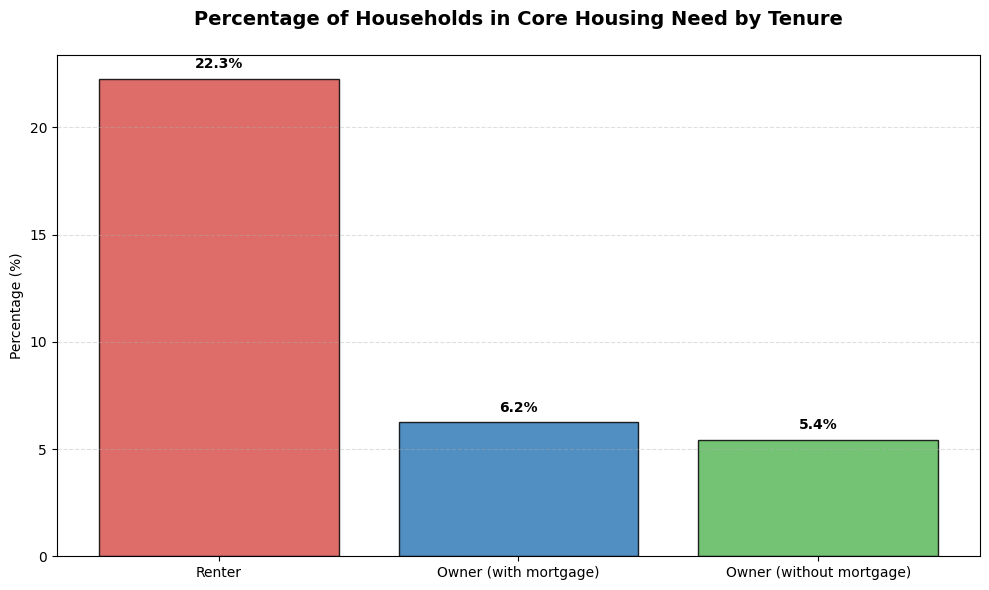

In [52]:
# Core Housing Need (PCHN): 1=Yes, 2=No, 9=Not Stated
df['PCHN_Clean'] = df['PCHN'].replace({9: pd.NA})
# Tenure (PDCT_05): 1=Owner, 2=Renter
df['PDCT_05_Clean'] = df['PDCT_05'].replace({9: pd.NA})
# Mortgage Status (POWN_20): 1=With mortgage, 2=Without mortgage
df['POWN_20_Clean'] = df['POWN_20'].replace({9: pd.NA})

# Define Tenure Groups (Mapping Logic)
def get_detailed_tenure(row):
    if pd.isna(row['PDCT_05_Clean']): return pd.NA
    if row['PDCT_05_Clean'] == 2:
        return 'Renter'
    elif row['PDCT_05_Clean'] == 1:
        if pd.isna(row['POWN_20_Clean']): return pd.NA
        return 'Owner (with mortgage)' if row['POWN_20_Clean'] == 1 else 'Owner (without mortgage)'
    return pd.NA

df['Detailed_Tenure'] = df.apply(get_detailed_tenure, axis=1)

# Calculate Weighted Percentages (PFWEIGHT)
df_graph = df.dropna(subset=['Detailed_Tenure', 'PCHN_Clean'])
group_totals = df_graph.groupby('Detailed_Tenure')['PFWEIGHT'].sum()
in_need_totals = df_graph[df_graph['PCHN_Clean'] == 1].groupby('Detailed_Tenure')['PFWEIGHT'].sum()

results = (in_need_totals / group_totals * 100).sort_values(ascending=False).reset_index()
results.columns = ['Tenure', 'Percentage']

# Visualization
plt.figure(figsize=(10, 6))
colors = ['#d9534f', '#337ab7', '#5cb85c'] # Stress-indicator colors
bars = plt.bar(results['Tenure'], results['Percentage'], color=colors, edgecolor='black', alpha=0.85)

plt.title('Percentage of Households in Core Housing Need by Tenure\n', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# **Bar chart: % of households in core housing need by income quintile**

,Quintile,Percentage
0,Q1 (Lowest),61.223735
1,Q2,34.133343
2,Q3,9.789936
3,Q4,0.757740
4,Q5 (Highest),NaN


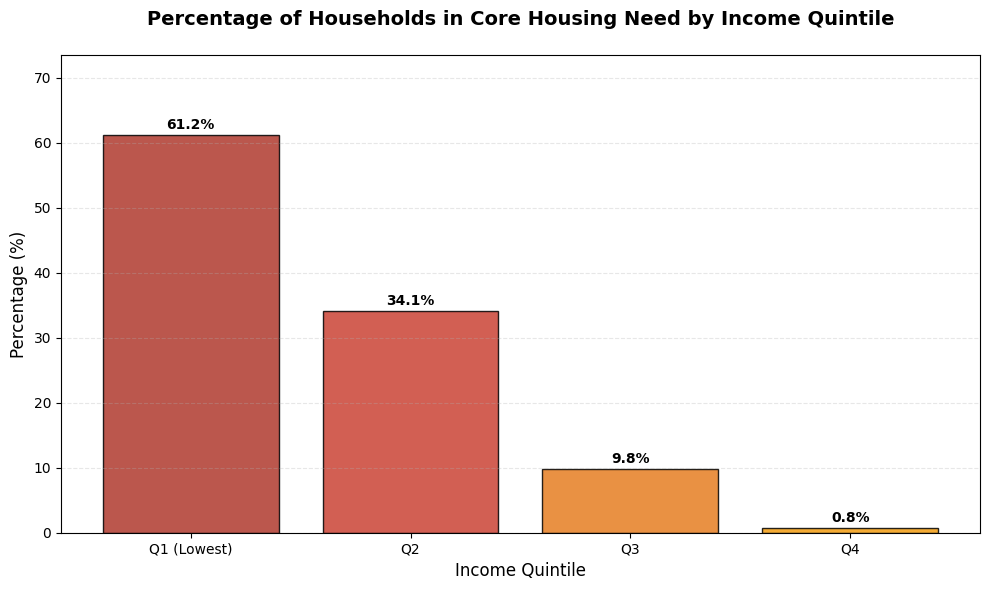

In [53]:
# Clean Core Housing Need (PCHN): 1=Yes, 2=No, 9=Not Stated
df['PCHN_Clean'] = df['PCHN'].replace({9: np.nan})

# Clean Income (PHHTTINC): Handling reserved codes from the notebook
income_garbage = [99999996, 99999999, 99999999999]
df['PHHTTINC_Clean'] = df['PHHTTINC'].replace(income_garbage, np.nan)

# Drop rows with missing values in either critical variable
df_analytic = df.dropna(subset=['PCHN_Clean', 'PHHTTINC_Clean']).copy()

# Create Income Quintiles (5 equal groups)
df_analytic['Income_Quintile'] = pd.qcut(df_analytic['PHHTTINC_Clean'], q=5,
                                          labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)'])

# Calculate Weighted Percentages (using PFWEIGHT)
# Sum weights for the whole quintile group
group_totals = df_analytic.groupby('Income_Quintile', observed=True)['PFWEIGHT'].sum()
# Sum weights for those in Core Housing Need within the group
in_need_totals = df_analytic[df_analytic['PCHN_Clean'] == 1].groupby('Income_Quintile', observed=True)['PFWEIGHT'].sum()

# Calculate percentages
results = (in_need_totals / group_totals * 100).reset_index()
results.columns = ['Quintile', 'Percentage']

# Visualization
plt.figure(figsize=(10, 6))
# Using a color gradient to reflect income levels
colors = ['#b03a2e', '#cb4335', '#e67e22', '#f39c12', '#f1c40f'] # Darker red for lowest income
bars = plt.bar(results['Quintile'], results['Percentage'], color=colors, edgecolor='black', alpha=0.85)

plt.title('Percentage of Households in Core Housing Need by Income Quintile\n', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Income Quintile', fontsize=12)
plt.ylim(0, results['Percentage'].max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('housing_need_by_income_quintile.png')
display(results)

,Province,Percentage
0,British Columbia,15.661076
1,Ontario,14.657392
2,Nova Scotia,12.444749
3,Alberta,11.551194
4,Manitoba,11.085585
5,New Brunswick,8.994166
6,Saskatchewan,8.788015
7,Newfoundland and Labrador,8.633506
8,Quebec,5.526418
9,Prince Edward Island,4.612685


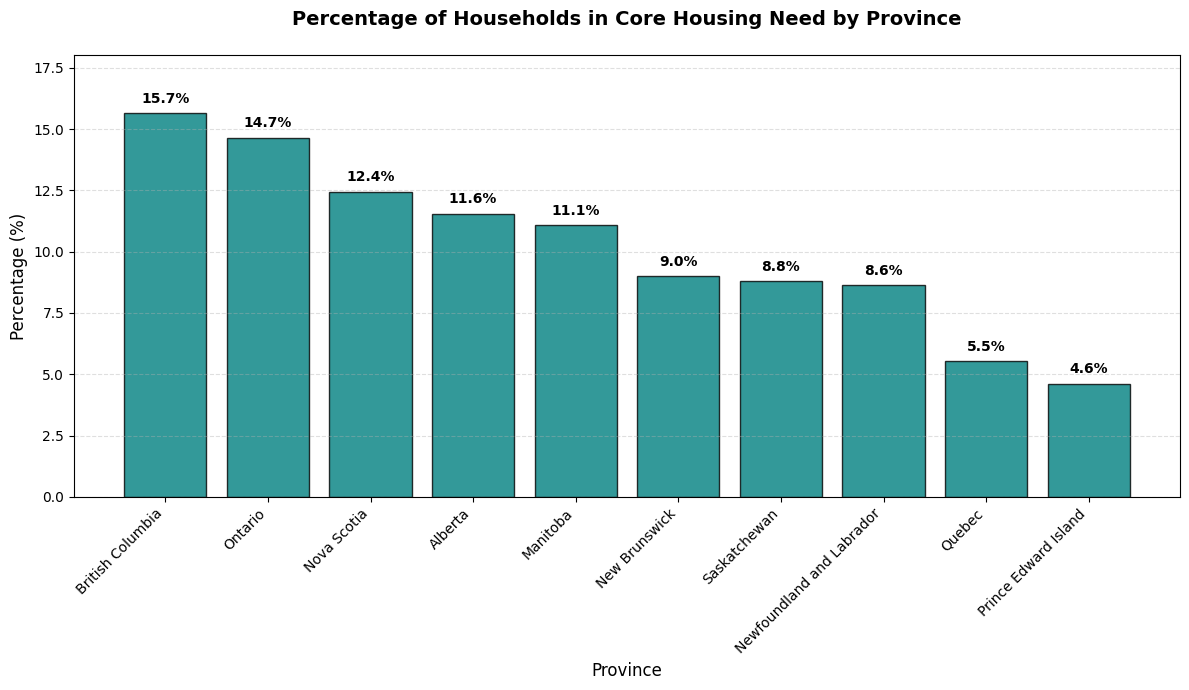

In [54]:
# Clean Core Housing Need (PCHN): 1=Yes, 2=No, 9=Not Stated
df['PCHN_Clean'] = df['PCHN'].replace({9: np.nan})

# Map Province Codes to Names (as per the user's notebook)
prov_map = {
    10: 'Newfoundland and Labrador', 11: 'Prince Edward Island',
    12: 'Nova Scotia', 13: 'New Brunswick', 24: 'Quebec',
    35: 'Ontario', 46: 'Manitoba', 47: 'Saskatchewan',
    48: 'Alberta', 59: 'British Columbia'
}
df['Province_Name'] = df['PPROV'].map(prov_map)

# Create Analytic Subset (Drop rows with NaN in PCHN)
df_analytic = df.dropna(subset=['PCHN_Clean', 'Province_Name']).copy()

# Calculate Weighted Percentages (using PFWEIGHT)
# Sum weights for each province
prov_totals = df_analytic.groupby('Province_Name')['PFWEIGHT'].sum()
# Sum weights for those in Core Housing Need (PCHN == 1) per province
in_need_totals = df_analytic[df_analytic['PCHN_Clean'] == 1].groupby('Province_Name')['PFWEIGHT'].sum()

# Resulting percentages
weighted_pct = (in_need_totals / prov_totals * 100).sort_values(ascending=False).reset_index()
weighted_pct.columns = ['Province', 'Percentage']

# 5. Visualization
plt.figure(figsize=(12, 7))
# Create the bar chart
bars = plt.bar(weighted_pct['Province'], weighted_pct['Percentage'], color='teal', edgecolor='black', alpha=0.8)

plt.title('Percentage of Households in Core Housing Need by Province\n', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Province', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(weighted_pct['Percentage']) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Data Labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('core_housing_need_by_province.png')

display(weighted_pct)

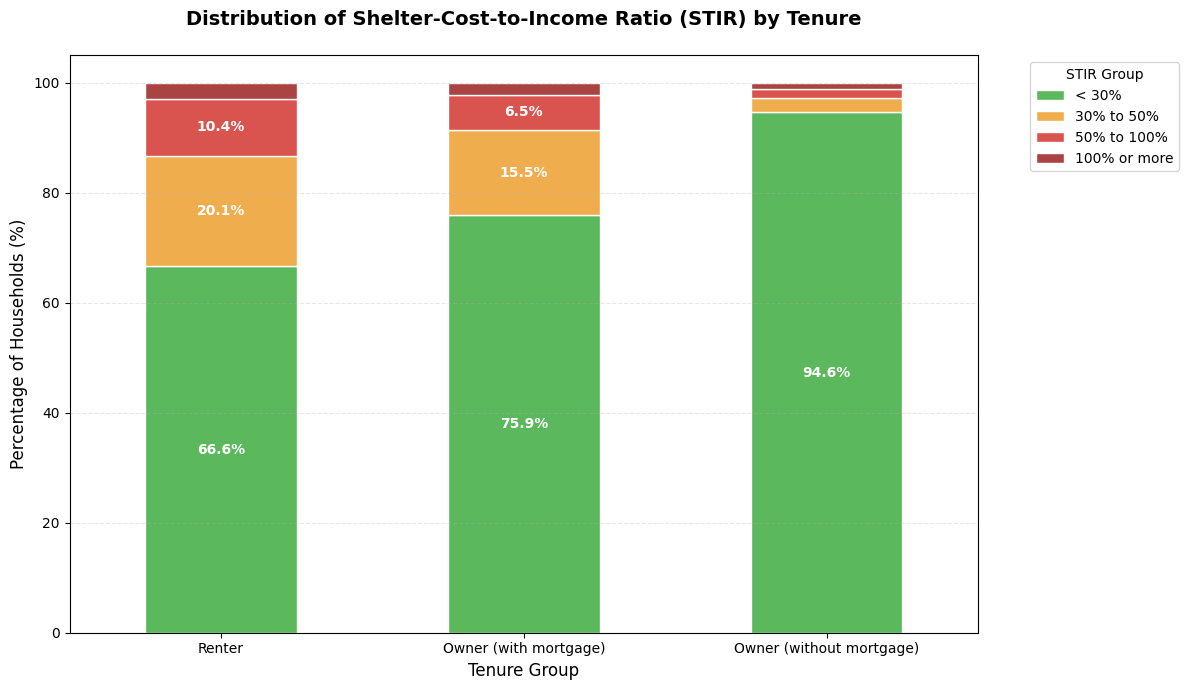

,< 30%,30% to 50%,50% to 100%,100% or more
Tenure_Group,,,,
Renter,66.621693,20.132040,10.352373,2.893894
Owner (with mortgage),75.897974,15.475411,6.474921,2.151693
Owner (without mortgage),94.636602,2.684047,1.527992,1.151359


In [55]:
# Cleaning and Mapping
# Clean PSTIR_GR (1=<30%, 2=30-50%, 3=50-100%, 4=>=100%, 5=N/A, 9=Not Stated)
df['PSTIR_GR_Clean'] = df['PSTIR_GR'].replace({5: np.nan, 9: np.nan})

# Labels for PSTIR
pstir_labels = {
    1: '< 30%',
    2: '30% to 50%',
    3: '50% to 100%',
    4: '100% or more'
}

# Clean Tenure (PDCT_05) and Mortgage (POWN_20)
df['PDCT_05_Clean'] = df['PDCT_05'].replace({9: np.nan})
df['POWN_20_Clean'] = df['POWN_20'].replace({9: np.nan})

def get_detailed_tenure(row):
    if pd.isna(row['PDCT_05_Clean']):
        return np.nan
    if row['PDCT_05_Clean'] == 2:
        return 'Renter'
    elif row['PDCT_05_Clean'] == 1:
        if pd.isna(row['POWN_20_Clean']):
            return np.nan
        if row['POWN_20_Clean'] == 1:
            return 'Owner (with mortgage)'
        elif row['POWN_20_Clean'] == 2:
            return 'Owner (without mortgage)'
    return np.nan

df['Tenure_Group'] = df.apply(get_detailed_tenure, axis=1)

# Filter for valid data
df_analytic = df.dropna(subset=['PSTIR_GR_Clean', 'Tenure_Group']).copy()

# Calculate Weighted Distribution
# Group by Tenure and PSTIR, then sum PFWEIGHT
weighted_counts = df_analytic.groupby(['Tenure_Group', 'PSTIR_GR_Clean'])['PFWEIGHT'].sum().unstack()

# Map the PSTIR labels
weighted_counts.columns = [pstir_labels[c] for c in weighted_counts.columns]

# Normalize to get percentages (row-wise sum = 100%)
weighted_pct = weighted_counts.div(weighted_counts.sum(axis=1), axis=0) * 100

# Reorder indices for better visualization if needed
order = ['Renter', 'Owner (with mortgage)', 'Owner (without mortgage)']
weighted_pct = weighted_pct.reindex(order)

# Visualization - Stacked Bar Chart
ax = weighted_pct.plot(kind='bar', stacked=True, figsize=(12, 7),
                       color=['#5cb85c', '#f0ad4e', '#d9534f', '#a94442'],
                       edgecolor='white')

plt.title('Distribution of Shelter-Cost-to-Income Ratio (STIR) by Tenure\n',
          fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Households (%)', fontsize=12)
plt.xlabel('Tenure Group', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='STIR Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add percentage labels inside segments
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 3: # Only show labels for segments large enough
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=10,
                color='white',
                fontweight='bold')

plt.tight_layout()
plt.savefig('stir_distribution_by_tenure_stacked.png')
plt.show()

display(weighted_pct)


MODELING PHASE


In [57]:
df_analytic["PCHN_Clean"].value_counts(dropna=False)

,count
PCHN_Clean,
2.0,30593
1.0,6098
NaN,537


In [58]:
df_analytic["PCHN_Clean"] = df_analytic["PCHN_Clean"].map({
    1: 0,  # not in core housing need
    2: 1   # in core housing need
})
df_analytic["PCHN_Clean"].value_counts()


,count
PCHN_Clean,
1.0,30593
0.0,6098


In [61]:
# 1) How many NaNs in target?
df_analytic["PCHN_Clean"].isna().sum(), len(df_analytic)


(np.int64(537), 37228)

In [63]:
# 2) See what values exist (including NaN)
df_analytic["PCHN_Clean"].value_counts(dropna=False)
df_analytic = df_analytic.dropna(subset=["PCHN_Clean"]).copy()
print("NaNs in target:", df_analytic["PCHN_Clean"].isna().sum())
print(df_analytic["PCHN_Clean"].value_counts())



NaNs in target: 0
PCHN_Clean
1.0    30593
0.0     6098
Name: count, dtype: int64


In [64]:
# === TASK 1: Create modeling matrix + stratified train/test split (NO PSTIR as predictor) ===

import pandas as pd
from sklearn.model_selection import train_test_split

# --- Guardrails ---
TARGET = "PCHN_Clean"
FORBIDDEN = {"PSTIR_GR_Clean"}  # validation only, never a predictor

# --- Core post-EDA features ---
base_features = [
    "PDCT_05_Clean",      # tenure
    "PHHTTINC_Clean",     # household income
    "Income_Quintile",    # optional (include only if present)
    "PHHSIZE_Clean",      # household size
    "PHTYPE",             # household composition
    "PMINOR",             # presence of children
    "PHGEDUC",            # education level
    "PEMPL",              # employment presence
]

# --- Choosing exactly ONE geography variable and (auto-pick if only one exists) ---
geo_candidates = ["Region_Name", "Province_Name"]
present_geo = [g for g in geo_candidates if g in df_analytic.columns]

if len(present_geo) == 0:
    raise ValueError("Neither Region_Name nor Province_Name found in df_analytic. Add one (not both).")
elif len(present_geo) == 2:
    raise ValueError("Both Region_Name and Province_Name found. Keep ONE only (not both) for modeling.")
else:
    GEO = present_geo[0]

# --- Build final feature list (only columns that exist, and never forbidden) ---
features = []
for c in base_features + [GEO]:
    if c in df_analytic.columns and c not in FORBIDDEN:
        features.append(c)

# hard fail if forbidden slipped in somehow
leaks = [c for c in features if c in FORBIDDEN]
if leaks:
    raise ValueError(f"Forbidden predictor(s) detected: {leaks}")

# --- Create X, y and basic checks ---
if TARGET not in df_analytic.columns:
    raise ValueError(f"Target column '{TARGET}' not found in df_analytic.")

X = df_analytic[features].copy()
y = df_analytic[TARGET].copy()

# ensure binary target
if set(pd.unique(y.dropna())) - {0, 1}:
    raise ValueError(f"{TARGET} must be binary 0/1. Found values: {sorted(pd.unique(y.dropna()))}")

# --- Stratified split (keeps ~16/84 ratio in both splits) ---
TEST_SIZE = 0.20
RANDOM_STATE = 42  # if you already standardized a seed, replace this number

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

# --- Quick sanity prints (must look right before modeling) ---
def pct_pos(arr):
    return float(arr.mean()) * 100

print("Features used:", features)
print(f"Rows: train={len(X_train)}, test={len(X_test)}")
print(f"Positive rate: overall={pct_pos(y):.2f}%, train={pct_pos(y_train):.2f}%, test={pct_pos(y_test):.2f}%")

# Optional: confirm forbidden isn't accidentally in X
assert all(col not in X_train.columns for col in FORBIDDEN), "Forbidden predictor leaked into X_train"


Features used: ['PDCT_05_Clean', 'PHHTTINC_Clean', 'PHTYPE', 'PMINOR', 'PHGEDUC', 'PEMPL', 'Province_Name']
Rows: train=29352, test=7339
Positive rate: overall=83.38%, train=83.38%, test=83.38%


FIT a baseline logistic regression

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(exclude=["object", "category"]).columns.tolist()

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore")),
])

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

preprocess = ColumnTransformer(transformers=[
    ("cat", categorical_pipe, cat_cols),
    ("num", numeric_pipe, num_cols),
])

logit = LogisticRegression(
    solver="saga",
    penalty="l2",
    max_iter=5000
)

baseline_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", logit),
])

baseline_model.fit(X_train, y_train)
print("Baseline logistic fitted (SAGA + numeric scaling).")



Baseline logistic fitted (SAGA + numeric scaling).


Evaluation (core metrics only)

In [70]:
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    recall_score,
    precision_score,
    confusion_matrix
)

# predicted probabilities for class "1"
y_prob = baseline_model.predict_proba(X_test)[:, 1]

# default threshold (0.5) — we'll revisit later
y_pred = (y_prob >= 0.5).astype(int)

print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
print("PR-AUC :", round(average_precision_score(y_test, y_prob), 4))
print("Recall :", round(recall_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


ROC-AUC: 0.9028
PR-AUC : 0.9799
Recall : 0.9451
Precision: 0.8988

Confusion matrix:
[[ 569  651]
 [ 336 5783]]


positive class = 1 = NOT in core housing need.

Confusion matrix is ordered as:

[[TN  FP]
 [FN  TP]]


TP = 5,783 → correctly identified NOT in need

FN = 336 → NOT-in-need households misclassified as in-need

FP = 651 → IN-need households misclassified as not-in-need ⚠️

TN = 569 → correctly identified IN-need

optimizing the wrong positive class ❌

In [71]:
# Flip labels so 1 = IN core housing need
y_test_flipped = 1 - y_test

y_pred_flipped = (y_prob < 0.5).astype(int)  # invert decision
y_prob_flipped = 1 - y_prob                 # invert probabilities

from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    recall_score,
    precision_score,
    confusion_matrix
)

print("ROC-AUC:", round(roc_auc_score(y_test_flipped, y_prob_flipped), 4))
print("PR-AUC :", round(average_precision_score(y_test_flipped, y_prob_flipped), 4))
print("Recall :", round(recall_score(y_test_flipped, y_pred_flipped), 4))
print("Precision:", round(precision_score(y_test_flipped, y_pred_flipped), 4))

print("\nConfusion matrix:")
print(confusion_matrix(y_test_flipped, y_pred_flipped))


ROC-AUC: 0.9028
PR-AUC : 0.5792
Recall : 0.4664
Precision: 0.6287

Confusion matrix:
[[5783  336]
 [ 651  569]]


[[TN  FP]
 [FN  TP]]
So:

TP = 569 → stressed households correctly identified

FN = 651 → stressed households missed ❌

FP = 336 → non-stressed flagged as stressed

TN = 5,783 → non-stressed correctly ignored

Out of 1,220 stressed households:

Moodel catch 569

Moodel miss 651

That's -47% recall

In [72]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score

# probabilities already computed earlier
# y_prob_flipped = probability of IN core housing need
# y_test_flipped = true label (1 = IN need)

thresholds = np.arange(0.1, 0.91, 0.05)

rows = []
for t in thresholds:
    y_pred_t = (y_prob_flipped >= t).astype(int)
    rows.append({
        "threshold": round(t, 2),
        "recall": recall_score(y_test_flipped, y_pred_t),
        "precision": precision_score(y_test_flipped, y_pred_t),
        "flagged_rate": y_pred_t.mean()  # % of households flagged
    })

threshold_table = pd.DataFrame(rows)
threshold_table


,threshold,recall,precision,flagged_rate
0,0.10,0.947541,0.378644,0.415997
1,0.15,0.895082,0.426563,0.348821
2,0.20,0.843443,0.472452,0.296771
3,0.25,0.792623,0.510560,0.258073
4,0.30,0.745082,0.530958,0.233274
5,0.35,0.693443,0.558416,0.206431
6,0.40,0.621311,0.587597,0.175773
7,0.45,0.550000,0.607240,0.150565
8,0.50,0.466393,0.628729,0.123314
9,0.55,0.372131,0.645804,0.095790


Calibration check on threshold of 0.3

In [74]:
from sklearn.calibration import calibration_curve
import pandas as pd
import numpy as np

# Use flipped labels (1 = IN housing need)
prob_true, prob_pred = calibration_curve(
    y_test_flipped,
    y_prob_flipped,
    n_bins=10,
    strategy="quantile"
)

calibration_df = pd.DataFrame({
    "mean_predicted_prob": prob_pred,
    "observed_rate": prob_true
})

calibration_df


,mean_predicted_prob,observed_rate
0,0.000005,0.000000
1,0.000223,0.000000
2,0.001972,0.000000
3,0.010260,0.008174
4,0.032420,0.029973
5,0.076967,0.065484
6,0.151451,0.149864
7,0.272574,0.276567
8,0.450639,0.494565
9,0.646767,0.637978


Finalize baseline flag

In [75]:
# === Finalize baseline risk flag (threshold = 0.30) ===

THRESHOLD = 0.30

# Predicted probability and flag (1 = IN core housing need)
df_test = X_test.copy()
df_test["prob_housing_stress"] = y_prob_flipped
df_test["Predicted_Housing_Stress"] = (y_prob_flipped >= THRESHOLD).astype(int)

# Sanity checks
print("Flagged rate (test):", round(df_test["Predicted_Housing_Stress"].mean(), 4))
print("Counts:", df_test["Predicted_Housing_Stress"].value_counts().to_dict())

# Optional: quick alignment check with true labels
from sklearn.metrics import confusion_matrix
print("\nConfusion matrix at threshold 0.30:")
print(confusion_matrix(y_test_flipped, df_test["Predicted_Housing_Stress"]))


Flagged rate (test): 0.2333
Counts: {0: 5627, 1: 1712}

Confusion matrix at threshold 0.30:
[[5316  803]
 [ 311  909]]


PSTIR robustness check

In [76]:
import pandas as pd

# Build a robustness table on the TEST set
robust_df = X_test.copy()
robust_df["PSTIR_GR_Clean"] = df_analytic.loc[X_test.index, "PSTIR_GR_Clean"]
robust_df["prob_housing_stress"] = y_prob_flipped
robust_df["Predicted_Housing_Stress"] = (y_prob_flipped >= 0.30).astype(int)
robust_df["True_Housing_Stress"] = y_test_flipped.values

# Drop missing PSTIR (if any)
robust_df = robust_df.dropna(subset=["PSTIR_GR_Clean"])

# Group by PSTIR category
pstir_table = (
    robust_df
    .groupby("PSTIR_GR_Clean")
    .agg(
        n_households=("True_Housing_Stress", "size"),
        true_stress_rate=("True_Housing_Stress", "mean"),
        predicted_risk_mean=("prob_housing_stress", "mean"),
        flagged_rate=("Predicted_Housing_Stress", "mean"),
    )
    .reset_index()
)

pstir_table


,PSTIR_GR_Clean,n_households,true_stress_rate,predicted_risk_mean,flagged_rate
0,1.0,5655,0.028824,0.108304,0.135102
1,2.0,1290,0.586047,0.330128,0.537209
2,3.0,394,0.763959,0.424811,0.647208
